In [2]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


gender = 0:"남자", 1:"여자"

race = 0: "white", 1: "Black", 2: "Asian", 3: "Indian", 4: "others"

In [3]:
images = []
ages = []
genders = []

image_dir = "/home/work/bachelor/deep_learning/UTKFace/datasets/part1"
for i in os.listdir(image_dir)[0:8000]:
	split = i.split('_')
	ages.append(int(split[0]))
	genders.append(int(split[1]))
	images.append(Image.open(os.path.join(image_dir, i)))


In [4]:
images = pd.Series(list(images), name='Images')
ages = pd.Series(list(ages), name='Ages')
genders = pd.Series(list(genders), name='Genders')

df = pd.concat([images, ages, genders], axis=1)
df


,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2,1
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,77,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,29,1
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,76,1
...,...,...,...
7995,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,1
7996,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,1
7997,<PIL.JpegImagePlugin.JpegImageFile image mode=...,60,1
7998,<PIL.JpegImagePlugin.JpegImageFile image mode=...,24,1


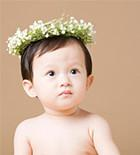

2 1


In [5]:
display(df['Images'][0])
print(df['Ages'][0], df['Genders'][0])


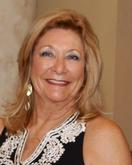

77 1


In [6]:
display(df['Images'][1])
print(df['Ages'][1], df['Genders'][1])


In [7]:
pip install --upgrade seaborn


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
DEPRECATION: devscripts 2.22.1ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of devscripts or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


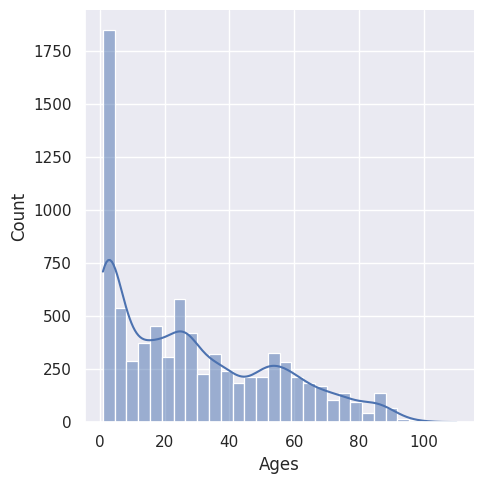

In [8]:
sns.set_theme()
sns.displot(df['Ages'], kde=True, bins=30)


Ages를 보니 어린 나이가 제일 데이터가 많다. 이거 전체로 비율 따져봐서 증강해야 할 듯.

데이터 증강법은 저번에 했던 skin-cancer.py에서 get_data.py를 봐서 고치면 될듯

혹은 어린아이 사진을 1/3만 쓰면 된다.

In [9]:
under4s = []

for i in range(len(df)):
	if df['Ages'].iloc[i] <= 4:
		under4s.append(df.iloc[i])

under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, under4s], ignore_index=True)


80대 이상이 너무 적어서 80세 이상을 제거하고 새로운 방법인 80세 이하까지 예측하고 나머지는 80세 이상으로 분류하기로 바꿔야 할듯

/tmp/ipykernel_692641/2317478498.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'], kde=True, bins=30)


<Axes: xlabel='Ages', ylabel='Density'>

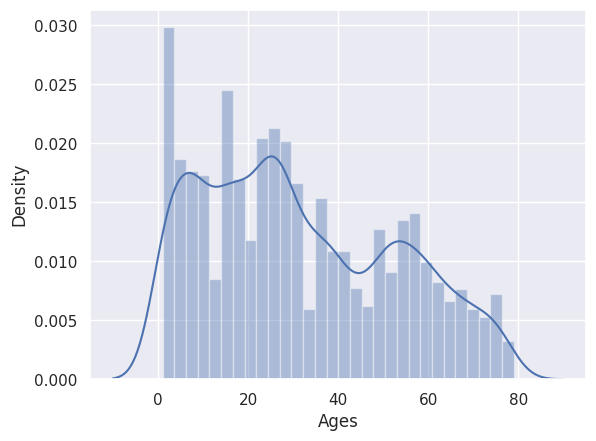

In [10]:
df = df[df['Ages'] < 80]
sns.distplot(df['Ages'], kde=True, bins=30)


<Axes: ylabel='count'>

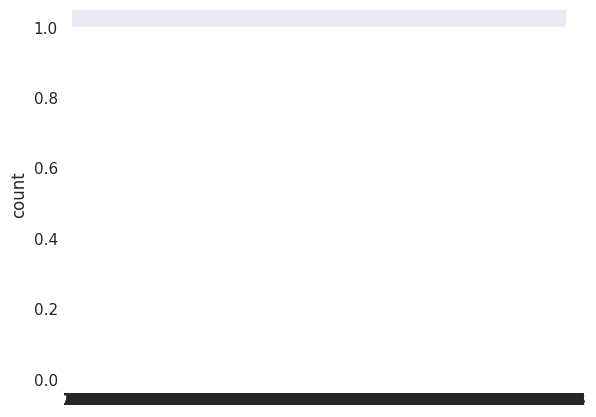

In [11]:
sns.countplot(df['Genders'])
